In [1]:
%pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Model ve Tahmin

In [6]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [7]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

## Model Tuning

In [8]:
xgb = XGBClassifier()

In [9]:
xgb_params = {"n_estimators": [100,500,1000,2000],
              "subsample": [0.6,0.8,1],
              "max_depth": [3,5,7],
              "learning_rate": [0.1,0.001,0.01]}

In [10]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] E

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=1; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; t

In [11]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 2000, 'subsample': 1}

In [12]:
xgb_tuned = XGBClassifier(learning_rate=0.001, max_depth=7, n_estimators=2000,subsample=1).fit(X_train,y_train)

In [13]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7316017316017316

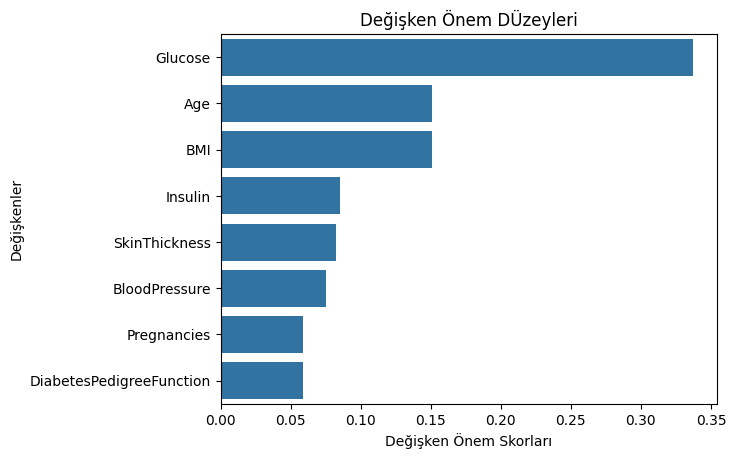

In [14]:
# degisken onem duzeyleri

feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem DÜzeyleri")
plt.show()